In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
pre = np.loadtxt("PE-new1pre.out")
premean = np.nanmean(pre)
eva = np.loadtxt("PE-new1.out")
evamean = np.nanmean(eva)
pre2 = pre[2:348]
PE = np.loadtxt("P-Enewnew.out")
PEmean = np.nanmean(PE)

In [14]:
PE.shape

(346,)

In [15]:
icenet.shape

(346,)

In [3]:
icesnow = np.loadtxt("icesnow.out")
iceevap = np.loadtxt("iceevap.out")
icenet = icesnow+iceevap

In [4]:
icesnow2 = np.loadtxt("icesnow2.out")

In [5]:
wspxx = np.loadtxt("wspxx2.out")
mrpxx = np.loadtxt("mrpxx2.out")
#arpxx = np.loadtxt("arpxx2.out")
t = np.arange(2,348,1)

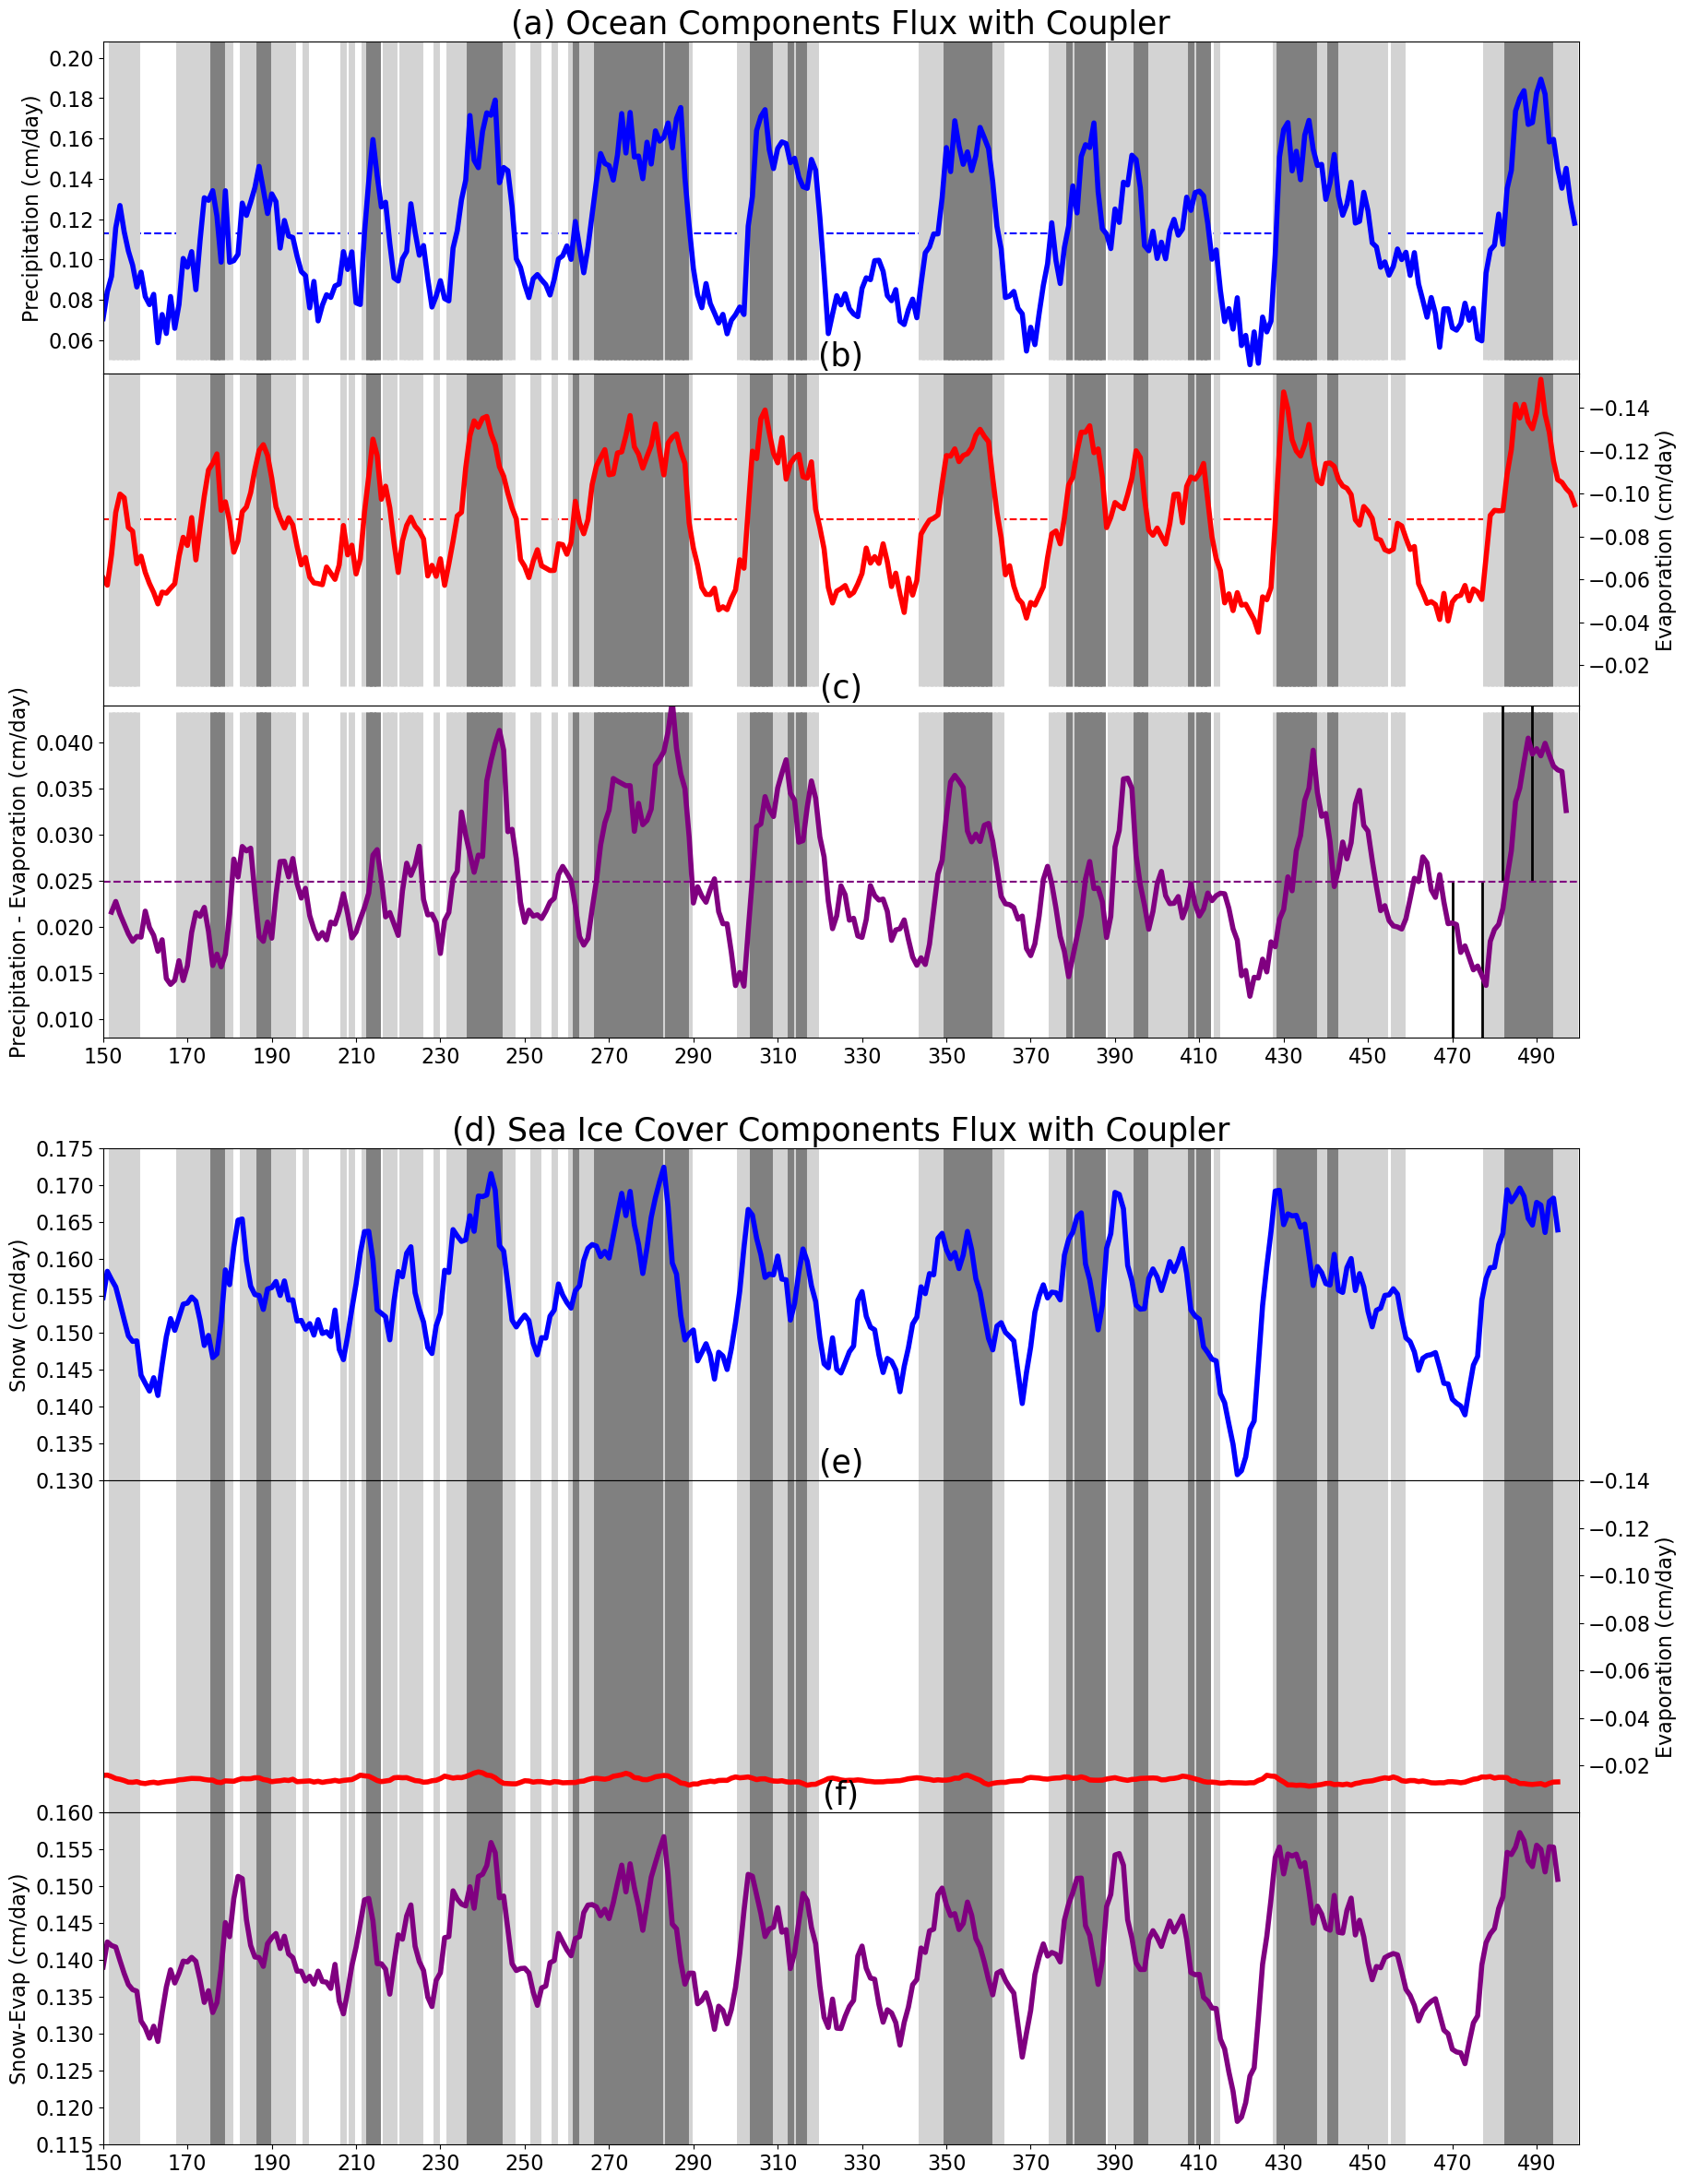

In [13]:
#t = np.arange(0,4176,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,20), dpi=100)
################################################################
################################################################
t = np.arange(0,350,1)
ax1 = fig.add_axes([0.1, 1.0, 0.8, 0.18],
                    xticklabels=[],ylim=(0.000004, 0.000020))

ax1.plot(pre*3600*24*100/997,'blue',linewidth=4)

#ax1.fill_between(t,premean,pre,where=pre < premean,facecolor='purple', alpha=1)
plt.hlines(premean*3600*24*100/997, 0, 350, colors = "blue",linestyles = "dashed")
#plt.vlines(arpxx, premean*3600*24*100/997, 0.000024*3600*24*100/997, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, 0.0000058*3600*24*100/997, 0.000024*3600*24*100/997, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, 0.0000058*3600*24*100/997, 0.000024*3600*24*100/997, colors = "grey",linewidth=5)
plt.ylabel('Precipitation (cm/day)',**my_font)
plt.axis("tight")
#ax1.set_title('a', y=1.0, pad=-140)
plt.title('(a) Ocean Components Flux with Coupler', fontsize=25)

ax1.set(ylim=(0.000005*3600*24*100/997, 0.000024*3600*24*100/997),xlim=(0, 350))
ax = plt.gca()
#ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.yaxis.get_offset_text().set_fontsize(16)
plt.yticks(**my_font)
#############################

###########################################
ax2 = fig.add_axes([0.1, 0.82, 0.8, 0.18],
                   xticklabels=[],ylim=(-0.000003, -0.000017))

ax2.plot(eva*3600*24*100/997,'red',linewidth=4)
#ax2.fill_between(t,evamean,eva,where=eva > evamean,facecolor='red', alpha=1)
plt.hlines(evamean*3600*24*100/997, 0, 350, colors = "red",linestyles = "dashed")
#plt.vlines(arpxx, evamean*3600*24*100/997, -0.000018*3600*24*100/997,colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, -0.01, -0.000018*3600*24*100/997, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx,-0.01, -0.000018*3600*24*100/997, colors = "grey",linewidth=5)
plt.ylabel('Evaporation (cm/day)',**my_font)
#plt.axis("tight")
ax2 = plt.gca()
#ax2.yaxis.get_major_formatter().set_powerlimits((0,1))
ax2.set(ylim=(-0.001, -0.000018*3600*24*100/997),xlim=(0, 350))
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.title('(b)', fontsize=25)
ax = plt.gca()
#ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.yaxis.get_offset_text().set_fontsize(16)
plt.yticks(**my_font)
################################################################
#####################################################################
t = np.arange(2,348,1)
ax3 = fig.add_axes([0.1, 0.64, 0.8, 0.18],
                   xticklabels=[],ylim=(34, 34.7))
#plt.vlines(arpxx, PEmean*3600*24*100/997, 0.000005*3600*24*100/997,colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, 0.0005, 0.000005*3600*24*100/997, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, 0.0005, 0.000005*3600*24*100/997, colors = "grey",linewidth=5)

plt.vlines(320, 0.008,0.025, colors = "black",linewidth=2)
plt.vlines(327, 0.008,0.025, colors = "black",linewidth=2)

plt.vlines(332, 0.025,0.044, colors = "black",linewidth=2)
plt.vlines(339, 0.025,0.044, colors = "black",linewidth=2)

ax3.plot(t,PE*3600*24*100/997,'purple',linewidth=4)
#ax3.fill_between(t,PE,PEmean,where=PEmean > PE,facecolor='green', alpha=1)
plt.hlines(PEmean*3600*24*100/997, 0, 350, colors = "purple",linestyles = "dashed")
plt.ylabel('Precipitation - Evaporation (cm/day)',**my_font)
ax3.set(ylim=(0.008, 0.044),xlim=(0, 350))
#ax3.yaxis.get_major_formatter().set_powerlimits((0,1))
ax3.yaxis.get_offset_text().set_fontsize(16)
plt.yticks(**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490'],**my_font)
plt.xticks(**my_font)
plt.title('(c)', fontsize=25)
###########################################
ax4 = fig.add_axes([0.1, 0.4, 0.8, 0.18],
                   xticklabels=[],ylim=(0.13,0.175))

ax4.plot(icesnow,'blue',linewidth=4)
plt.vlines(mrpxx, 0.0000058*3600*24*100/997, 0.000024*3600*24*100/997, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, 0.0000058*3600*24*100/997, 0.000024*3600*24*100/997, colors = "grey",linewidth=5)
plt.ylabel('Snow (cm/day)',**my_font)
plt.axis("tight")
plt.title('Snow fall rate from coupler (ice) 5 year running mean', fontsize=25)
ax4.set(ylim=(0.13,0.175),xlim=(0, 350))
ax = plt.gca()
#ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.yaxis.get_offset_text().set_fontsize(16)
plt.yticks(**my_font)

plt.yticks(**my_font)
plt.title('(d) Sea Ice Cover Components Flux with Coupler', fontsize=25)
#########################################
ax5 = fig.add_axes([0.1, 0.22, 0.8, 0.18],
                    xticklabels=[],ylim=(-0.018,-0.01))
ax5.plot(iceevap,'red',linewidth=4)

#ax1.fill_between(t,premean,pre,where=pre < premean,facecolor='purple', alpha=1)
#plt.hlines(premean*3600*24*100/997, 0, 350, colors = "blue",linestyles = "dashed")
#plt.vlines(arpxx, premean*3600*24*100/997, 0.000024*3600*24*100/997, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, -0.14,0, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, -0.14,0, colors = "grey",linewidth=5)
plt.ylabel('Evaporation (cm/day)',**my_font)
plt.axis("tight")
plt.title('(e)', fontsize=25)
#plt.title('Snow evaporation rate from coupler (ice) 5 year running mean', fontsize=25)
ax5.set(ylim=(-0.0001,-0.14),xlim=(0, 350))
ax5 = plt.gca()
#ax2.yaxis.get_major_formatter().set_powerlimits((0,1))

ax5.yaxis.set_label_position('right')
ax5.yaxis.set_ticks_position('right')
ax5.yaxis.get_offset_text().set_fontsize(25)
plt.yticks(**my_font)
########################
ax6 = fig.add_axes([0.1, 0.04, 0.8, 0.18],xticklabels=[])
ax6.plot(icenet,'purple',linewidth=4)

#ax1.fill_between(t,premean,pre,where=pre < premean,facecolor='purple', alpha=1)
#plt.hlines(premean*3600*24*100/997, 0, 350, colors = "blue",linestyles = "dashed")
#plt.vlines(arpxx, premean*3600*24*100/997, 0.000024*3600*24*100/997, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, 0.0000058*3600*24*100/997, 0.000024*3600*24*100/997, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, 0.0000058*3600*24*100/997, 0.000024*3600*24*100/997, colors = "grey",linewidth=5)
plt.ylabel('Snow-Evap (cm/day)',**my_font)
plt.axis("tight")

#plt.title('Snow-Evaporation rate from coupler (ice) 5 year running mean', fontsize=25)

ax6.set(ylim=(0.115,0.16),xlim=(0, 350))
ax = plt.gca()
#ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax.yaxis.get_offset_text().set_fontsize(16)
plt.yticks(**my_font)
plt.title('(f)', fontsize=25)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490'],**my_font)
plt.xticks(**my_font)
plt.savefig("seaiceinone.png",bbox_inches='tight',dpi=fig.dpi)

In [16]:
np.savetxt('icenet.out', icenet)